In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import create_engine
database_path = 'sql_hw'
host = 'localhost'
port = 5432
username = 'postgres'
password = 'postgres'
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database_path}')
#engine = create_engine(f'postgresql://localhost:5432/{database_path}')

connection = engine.connect()

In [3]:
data = pd.read_sql("SELECT * FROM salaries",connection)
data.head()

,emp_id,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
salaries = pd.read_sql("SELECT emp_id, salary FROM salaries", connection)
salaries.head()




,emp_id,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


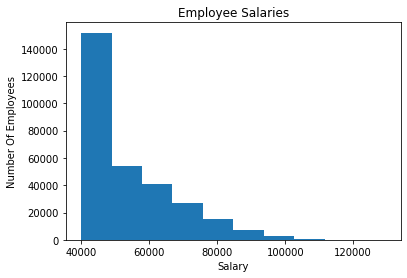

In [5]:
bins = [0,50000,100000,250000,500000,1000000]

plt.hist(salaries['salary'])
plt.xlabel('Salary')
plt.ylabel('Number Of Employees')
plt.title('Employee Salaries')
plt.show()

In [6]:
title = pd.read_sql("SELECT emp_id, title FROM titles ", connection)
title.head()

,emp_id,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer


In [8]:
combine = pd.merge(salaries,title,on="emp_id",how='left')

In [9]:
x = combine['title']
y = combine['salary']

In [ ]:
plt.bar(x,y)
plt.show()